In [1]:
import pandas as pda
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


DataSet : The dataset used here for credit card fraud detection is from the following Kaggle URL :

https://www.kaggle.com/mlg-ulb/creditcardfraud

- Time : Number of seconds elapsed between this transaction and the first transaction in the dataset
- V1 to V28 : may be result of a PCA Dimensionality reduction to protect user identities and sensitive features
- Amount : Transaction amount
- Class : 1 for fraudulent transactions, 0 otherwise





In [2]:
df = pd.read_csv("data/creditcard_data.csv")


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405007e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284806 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284806 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284806 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284806 non-null  float64
 8   V8      284806 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284806 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284806 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284806 non-null  float64
 18  V18     284806 non-null  float64
 19  V19     284806 non-null  float64
 20  V20     284806 non-null  float64
 21  V21     28

In [6]:
df["Amount"].describe()

count    284806.000000
mean         88.349168
std         250.120432
min           0.000000
25%           5.600000
50%          22.000000
75%          77.160000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
df["Class"].value_counts()

0    284314
1       492
Name: Class, dtype: int64

Positive classes are less than 1% of the dataset.

<AxesSubplot:xlabel='Amount', ylabel='Class'>

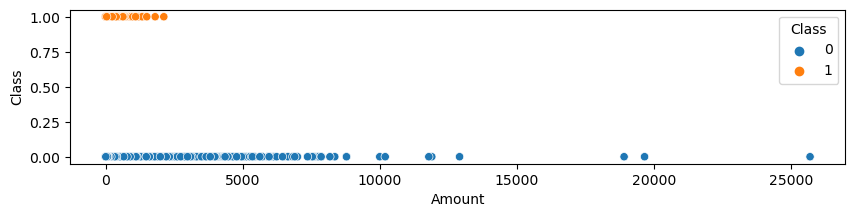

In [8]:
plt.figure(figsize=(10, 2))
sns.scatterplot(x="Amount", y="Class", data=df, hue="Class")

Most positive class cases have transaction amounts that are <2500. But transactions that are <2500 are still a significant proportion of negative classes also. Need to examine other features.

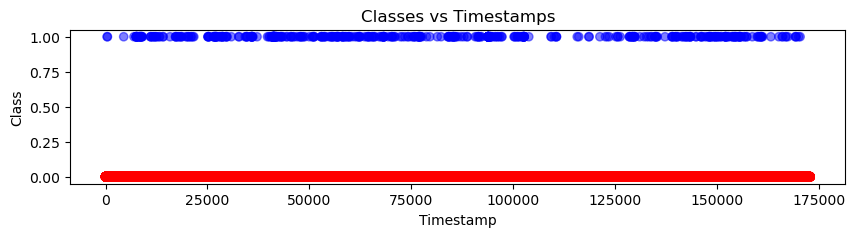

In [9]:
plt.figure(figsize=(10, 2))
plt.scatter(df["Time"], df["Class"], alpha=0.5, color=df["Class"].map({0: 'red', 1: 'blue'}))


plt.title(f'Classes vs Timestamps')
plt.xlabel('Timestamp')
plt.ylabel('Class')
plt.show()

There does not appear to be any relation of timestamp with fraud cases as well. We can verify it further by plotting a heatmap. 

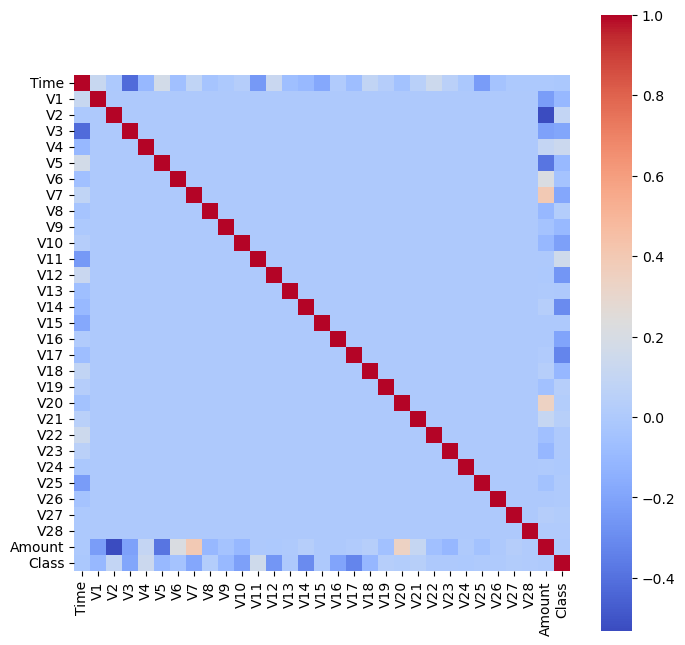

In [10]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix,square = True, cmap='coolwarm')
plt.show()

Conclusions from EDA:
- "Class" does not seem correlated with "Time" nor "Amount". 
- The other variables, especially V1 to V18, appear to have some amounts of (positive and negative) correlation with "Class".

Further considerations for machine learning algorithm:
- Given the highly imbalanced dataset, it might be good to generate synthetic samples. However, given the huge imbalance, simpler techniques like SMOTE or ADASYN might be preferable for speed. We will explore how models perform both with and without synthetic data generation.
- This can potentially be an anomaly detection problem and we can consider an unsupervised machine learning algorithm to model the data. But we can also view this as a classification problem and used a supervised model. We will explore both.
- Because features V1 to V28 are processed with PCA, the interpretability of feature importance after training the model is not clear. 